In [1]:
#r "nuget:ScottPlot, 5.0.*"

Installed Packages ScottPlot, 5.0.55

Loading extensions from `/home/daniil/.nuget/packages/skiasharp/2.88.9/interactive-extensions/dotnet/SkiaSharp.DotNet.Interactive.dll`

In [2]:
using Microsoft.DotNet.Interactive.Formatting;
using System.Text.Json;
using System.Drawing;
using ScottPlot;
using System.IO;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(400, 300)), HtmlFormatter.MimeType);


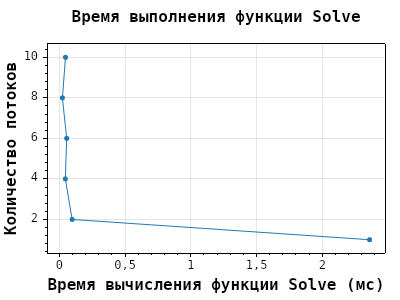

In [3]:
string json = File.ReadAllText("chartData.json");

public class ChartData
{
    public int[] ThreadsCount { get; set; }
    public double[] Times { get; set; }
}

ChartData chartData = JsonSerializer.Deserialize<ChartData>(json);
int[] threadsCount = chartData.ThreadsCount;
double[] times = chartData.Times;

var plot = new ScottPlot.Plot();
plot.Add.Scatter(times, threadsCount.Select(x => (double)x).ToArray());
plot.Title("Время выполнения функции Solve");
plot.XLabel("Время вычисления функции Solve (мс)");
plot.YLabel("Количество потоков");
plot.SavePng("./result.png", 600, 400);

plot